Number of Omega-automaton states (including the trap state): 4


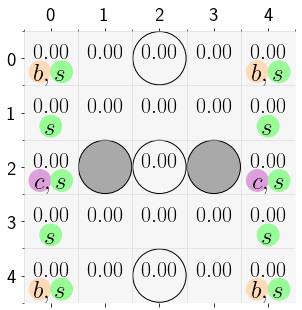

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'G F b & G F c & F G s & G !a'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'B',  'T',  'B',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'T',  'E',  'E']
])

label = np.array([
    [('b','s'), (),        (),        (),        ('b','s')],
    [('s',),    (),        (),        (),        ('s',)   ],
    [('c','s'), (),        (),        (),        ('c','s')],
    [('s',),    (),        (),        (),        ('s',)   ],
    [('b','s'), (),        (),        (),        ('b','s')],
],dtype=np.object)

reward = np.zeros(shape)
lcmap={
    'b':'peachpuff',
    'c':'plum',
    's':'palegreen',
    'a':'red'
}

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=5,adversary=('a',),lcmap=lcmap,p=0.6)  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 0,
   ('a',): 2,
   ('b',): 0,
   ('c',): 0,
   ('s',): 0,
   ('a', 'b'): 2,
   ('a', 'c'): 2,
   ('a', 's'): 2,
   ('b', 'c'): 0,
   ('b', 's'): 1,
   ('c', 's'): 0,
   ('a', 'b', 'c'): 2,
   ('a', 'b', 's'): 2,
   ('a', 'c', 's'): 2,
   ('b', 'c', 's'): 1,
   ('a', 'b', 'c', 's'): 2},
  {(): 0,
   ('a',): 2,
   ('b',): 0,
   ('c',): 0,
   ('s',): 1,
   ('a', 'b'): 2,
   ('a', 'c'): 2,
   ('a', 's'): 2,
   ('b', 'c'): 0,
   ('b', 's'): 1,
   ('c', 's'): 0,
   ('a', 'b', 'c'): 2,
   ('a', 'b', 's'): 2,
   ('a', 'c', 's'): 2,
   ('b', 'c', 's'): 0,
   ('a', 'b', 'c', 's'): 2},
  {(): 2,
   ('a',): 2,
   ('b',): 2,
   ('c',): 2,
   ('s',): 2,
   ('a', 'b'): 2,
   ('a', 'c'): 2,
   ('a', 's'): 2,
   ('b', 'c'): 2,
   ('b', 's'): 2,
   ('c', 's'): 2,
   ('a', 'b', 'c'): 2,
   ('a', 'b', 's'): 2,
   ('a', 'c', 's'): 2,
   ('b', 'c', 's'): 2,
   ('a', 'b', 'c', 's'): 2},
  {(): 3,
   ('a',): 3,
   ('b',): 3,
   ('c',): 3,
   ('s',): 3,
   ('a', 'b

In [3]:
Q,Q_=csrl.minimax_q(T=2**7,K=2**12,start=(0,4),start_=(4,0))
# Q,Q_ = np.load('Q,Q_.npy')

In [4]:
policy = np.argmax(Q,axis=-1)
policy_ = np.argmin(Q_,axis=-1)
value = np.max(Q,axis=-1)
csrl.plot(value=value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [5]:
csrl.plot(policy=policy)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [6]:
csrl.plot(policy=policy,iq=(0,0))

interactive(children=(IntSlider(value=0, description='r1', max=4), IntSlider(value=0, description='c1', max=4)…

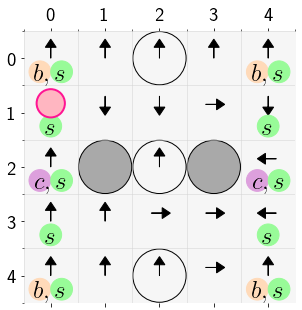

In [7]:
csrl.plot(policy=policy,iq=(0,0),rc_=(1,0),agent_=(1,0))

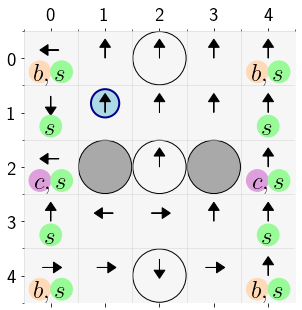

In [8]:
csrl.plot(policy=policy,policy_=policy_,iq=(0,0),rc=(1,1),agent=(1,1))

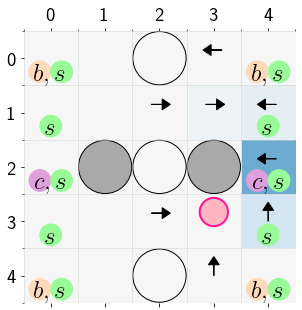

In [9]:
csrl.plot(value=value,policy=policy,iq=(0,0),rc_=(3,3),agent_=(3,3))

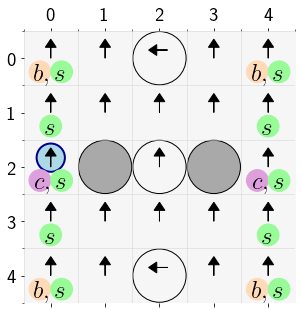

In [10]:
csrl.plot(policy=policy,policy_=policy_,iq=(0,0),rc=(2,0),agent=(2,0))

In [11]:
episode=csrl.simulate(policy,policy_,start=(0,4),start_=(4,0),T=512,plot=True)

interactive(children=(IntSlider(value=0, description='t', max=511), Output()), _dom_classes=('widget-interact'…

In [12]:
# np.save('Q,Q_',(Q,Q_))

In [13]:
np.max(Q)

0.00012490437765775455